# RK4 Method -- Massive Particle Motion under Schwarzschild Metric

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [3]:
M = 1  # Assuming a unit mass for simplicity, can be changed
epsilon = 1
#光子轨道请将epsilon设置为0

In [4]:
def derivatives(t, y):
    r, theta, phi, u1d, u2d, u3d = y

    # Provided equations
    dx1_dt = (u1d * np.sqrt(1 - 2 * M / r) * (r - 2 * M)) / (r * np.sqrt(u1d**2 * (1 - 2 * M / r) + u2d**2 / r**2 + u3d**2 * (1/np.sin(theta))**2 / r**2 + epsilon))
    dx2_dt = (u2d * np.sqrt(1 - 2 * M / r)) / (r**2 * np.sqrt(u1d**2 * (1 - 2 * M / r) + u2d**2 / r**2 + u3d**2 * (1/np.sin(theta))**2 / r**2 + epsilon))
    dx3_dt = (u3d * (1/np.sin(theta))**2 * np.sqrt(1 - 2 * M / r)) / (r**2 * np.sqrt(u1d**2 * (1 - 2 * M / r) + u2d**2 / r**2 + u3d**2 * (1/np.sin(theta))**2 / r**2 + epsilon))
    du1d_dt = (4 * M**2 * r * u1d**2 - M * (r**2 * (2 * u1d**2 + epsilon) + 3 * u2d**2) + u3d**2 * (1/np.sin(theta))**2 * (r - 3 * M) + r * u2d**2) / (r**4 * np.sqrt(1 - 2 * M / r) * np.sqrt(((r * (u1d**2 * (r - 2 * M) + r * epsilon)) + u2d**2 + u3d**2 * (1/np.sin(theta))**2) / r**2))
    du2d_dt = (u3d**2 * (1/np.tan(theta)) * (1/np.sin(theta))**2 * np.sqrt(1 - 2 * M / r)) / (r**2 * np.sqrt(((r * (u1d**2 * (r - 2 * M) + r * epsilon)) + u2d**2 + u3d**2 * (1/np.sin(theta))**2) / r**2))
    du3d_dt = 0
    return np.array([dx1_dt, dx2_dt, dx3_dt, du1d_dt, du2d_dt, du3d_dt])

In [5]:
def rk4_step(func, t, y, dt):
    k1 = func(t, y)
    k2 = func(t + 0.5*dt, y + 0.5*dt*k1)
    k3 = func(t + 0.5*dt, y + 0.5*dt*k2)
    k4 = func(t + dt, y + dt*k3)
    return y + dt * (k1 + 2*k2 + 2*k3 + k4) / 6

In [6]:
#这部分已经没用了
def cartesian_to_spherical(x, y, z, vx, vy, vz):
    # Position conversion
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z / r) if r != 0 else 0
    phi = np.arctan2(y, x)

    # Velocity conversion
    u1 = (x*vx + y*vy + z*vz) / r  # Radial velocity
    u2 = (z*(x*vx + y*vy) - r**2 * vz) / (r**2 * np.sin(theta))  # Theta velocity
    u3 = (x*vy - y*vx) / (r**2 * np.sin(theta))  # Phi velocity

    u1d = (1 - 2*M / r) * u1  # Radial velocity in Schwarzschild coordinates
    u2d = (1 / r**2) * u2  # Theta velocity in Schwarzschild coordinates
    u3d = (1 / np.sin(theta)**2) / (r**2) * u3  # Phi velocity in Schwarzschild coordinates

    return r, theta, phi, u1d, u2d, u3d

In [7]:
# 初始坐标条件（请无视一般不会使用xyz坐标，都是用球坐标）
x1, x2, x3 = 20, 0, 0  # XYZ initial position
v1, v2, v3 = 0.8 , 0.0 ,0.7# XYZ initial velocity

#initial_conditions_spherical = cartesian_to_spherical(x1, x2, x3, v1, v2, v3)
initial_conditions_spherical = np.array([4.3384862594353, np.pi/2 , 0, 0, 0, 3.75])
print([*initial_conditions_spherical])
print(np.sqrt(v1**2+v2**2+v3**2))

[np.float64(4.3384862594353), np.float64(1.5707963267948966), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(3.75)]
1.063014581273465


In [8]:
# 定义初始值和步长以及时间
initial_conditions = [*initial_conditions_spherical]
t_span = (0,5000)
dt = 0.1
t_values = np.arange(t_span[0], t_span[1], dt)
#%%


In [9]:
# 用RK4方法求解
y_values = [initial_conditions]
for t in t_values[1:]:
    y = rk4_step(derivatives, t, y_values[-1], dt)
    y_values.append(y)
y_values = np.array(y_values)

/tmp/ipykernel_12463/3000847607.py:8: RuntimeWarning: overflow encountered in scalar multiply
  du1d_dt = (4 * M**2 * r * u1d**2 - M * (r**2 * (2 * u1d**2 + epsilon) + 3 * u2d**2) + u3d**2 * (1/np.sin(theta))**2 * (r - 3 * M) + r * u2d**2) / (r**4 * np.sqrt(1 - 2 * M / r) * np.sqrt(((r * (u1d**2 * (r - 2 * M) + r * epsilon)) + u2d**2 + u3d**2 * (1/np.sin(theta))**2) / r**2))
/tmp/ipykernel_12463/3000847607.py:8: RuntimeWarning: invalid value encountered in scalar subtract
  du1d_dt = (4 * M**2 * r * u1d**2 - M * (r**2 * (2 * u1d**2 + epsilon) + 3 * u2d**2) + u3d**2 * (1/np.sin(theta))**2 * (r - 3 * M) + r * u2d**2) / (r**4 * np.sqrt(1 - 2 * M / r) * np.sqrt(((r * (u1d**2 * (r - 2 * M) + r * epsilon)) + u2d**2 + u3d**2 * (1/np.sin(theta))**2) / r**2))


In [10]:
# 转换为极坐标
r = y_values[:, 0]
theta = y_values[:, 1]
phi = y_values[:, 2]

x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

In [11]:
# 画出施瓦西半径
phi_sphere, theta_sphere = np.meshgrid(np.linspace(0, 2 * np.pi, 100), np.linspace(0, np.pi, 100))
x_sphere = 2 * np.sin(theta_sphere) * np.cos(phi_sphere)
y_sphere = 2 * np.sin(theta_sphere) * np.sin(phi_sphere)
z_sphere = 2 * np.cos(theta_sphere)

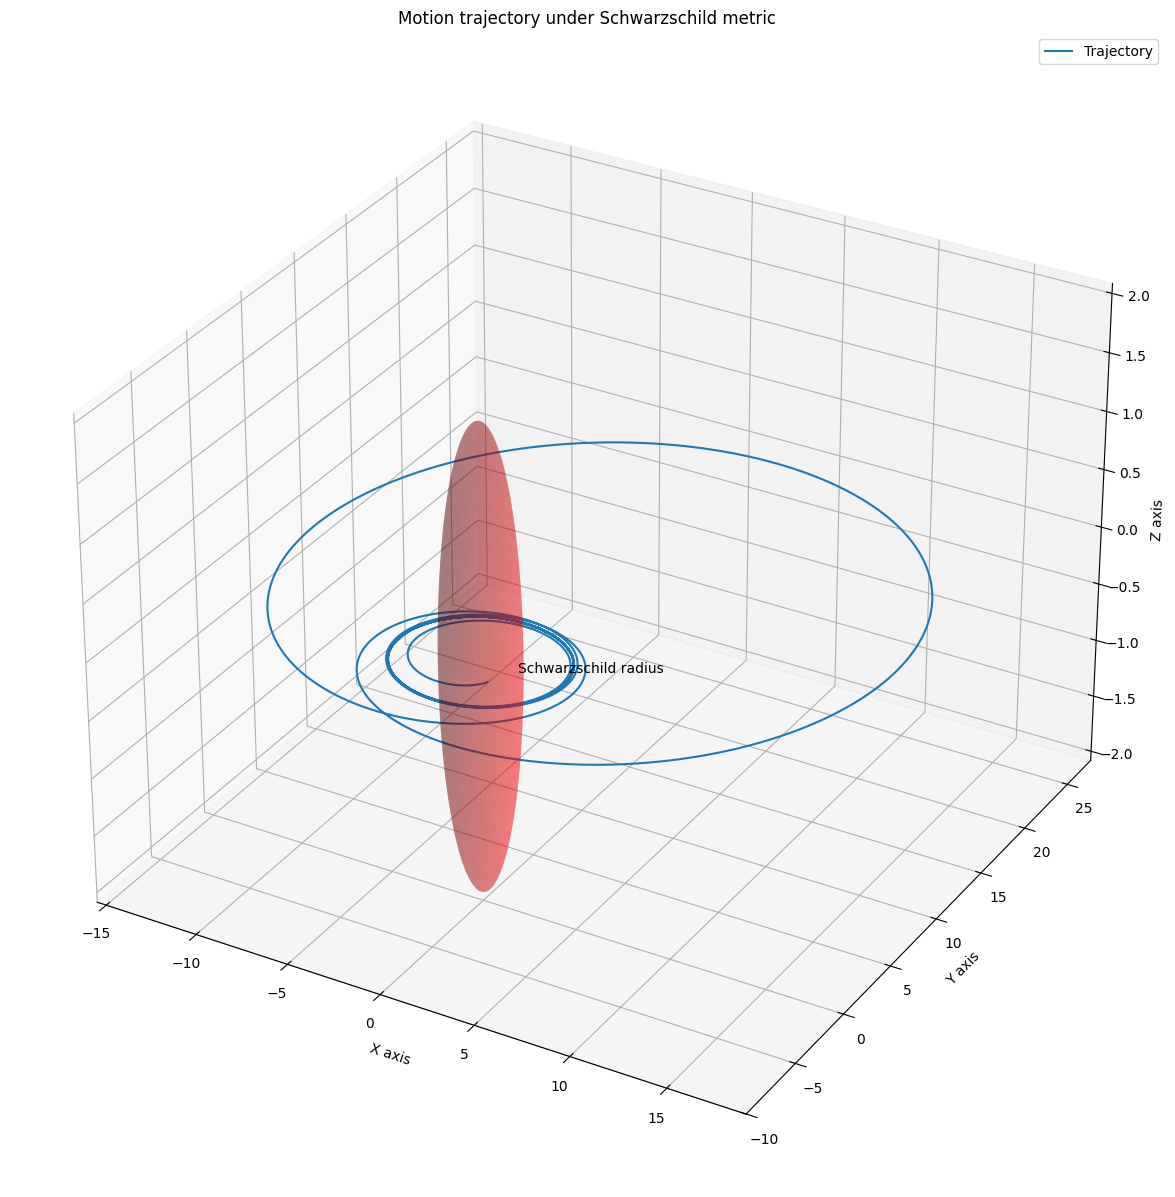

In [12]:
# 画图3d图像
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='red', alpha=0.3)
ax.plot(x, y, z, label='Trajectory')  # Trajectory
ax.text(2, 0, 0, "Schwarzschild radius", color='black')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Motion trajectory under Schwarzschild metric')
# 调整三维轴的比例

ax.legend()
plt.show()

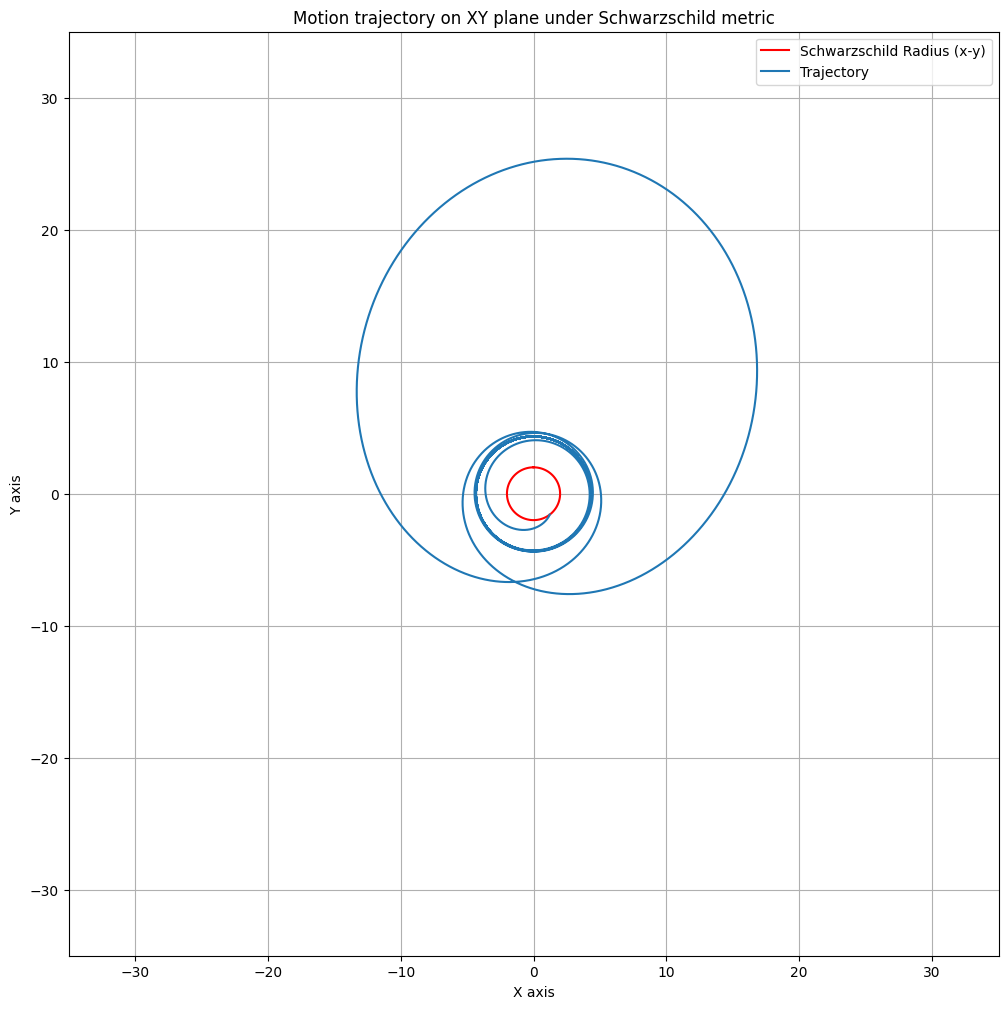

In [13]:
# 円の座標を設定
theta_circle = np.linspace(0, 2 * np.pi, 100)
x_circle = 2 * np.sin(theta_circle)
y_circle = 2 * np.cos(theta_circle)
# 画图
plt.figure(figsize=(12, 12))
plt.plot(x_circle, y_circle, color='red',label='Schwarzschild Radius (x-y)')
plt.plot(x, y, label='Trajectory')  # Trajectory on XY plane

plt.xlim(-35, 35)  # 设置横坐标范围
plt.ylim(-35, 35)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Motion trajectory on XY plane under Schwarzschild metric')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
#绘制动画，防止自动运行先注释掉
"""
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle
# 假设 x 和 y 是您已经计算好的轨迹坐标

# 创建图形和二维轴
fig, ax = plt.subplots(figsize=(15, 15))

# 设置轴的限制
ax.set_xlim([np.min(x), np.max(x)])
ax.set_ylim([np.min(y), np.max(y)])

# 绘制施瓦西半径的圆圈
schwarzschild_radius = 2
circle = Circle((0, 0), schwarzschild_radius, color='red', alpha=0.3)
ax.add_patch(circle)

# 初始化一条空线来代表轨迹
line, = ax.plot([], [], 'b-', label='Trajectory')

# 初始化函数，用于FuncAnimation
def init():
    line.set_data([], [])
    return line,

# 更新函数，用于FuncAnimation
def update(frame):
    # 更新更多的数据点
    step = 300  # 每次更新的数据点数
    end = min(frame * step, len(x))
    line.set_data(x[:end], y[:end])
    return line,
# 计算总帧数
fps = 50  # 每秒帧数
animation_length = 60  # 动画长度（秒）
total_frames = fps * animation_length
# 创建动画并赋值给变量
ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, blit=False, interval=20)
ani.save('trajectory_animation.mp4', writer='ffmpeg', fps=50)
# 显示动画
plt.show()
"""

"\n%matplotlib notebook\nimport matplotlib.pyplot as plt\nfrom matplotlib.animation import FuncAnimation\nfrom matplotlib.patches import Circle\n# 假设 x 和 y 是您已经计算好的轨迹坐标\n\n# 创建图形和二维轴\nfig, ax = plt.subplots(figsize=(15, 15))\n\n# 设置轴的限制\nax.set_xlim([np.min(x), np.max(x)])\nax.set_ylim([np.min(y), np.max(y)])\n\n# 绘制施瓦西半径的圆圈\nschwarzschild_radius = 2\ncircle = Circle((0, 0), schwarzschild_radius, color='red', alpha=0.3)\nax.add_patch(circle)\n\n# 初始化一条空线来代表轨迹\nline, = ax.plot([], [], 'b-', label='Trajectory')\n\n# 初始化函数，用于FuncAnimation\ndef init():\n    line.set_data([], [])\n    return line,\n\n# 更新函数，用于FuncAnimation\ndef update(frame):\n    # 更新更多的数据点\n    step = 300  # 每次更新的数据点数\n    end = min(frame * step, len(x))\n    line.set_data(x[:end], y[:end])\n    return line,\n# 计算总帧数\nfps = 50  # 每秒帧数\nanimation_length = 60  # 动画长度（秒）\ntotal_frames = fps * animation_length\n# 创建动画并赋值给变量\nani = FuncAnimation(fig, update, frames=total_frames, init_func=init, blit=False, interval=20)\nani.sa